In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

sns.set_style('dark')
plt.rcParams['font.size']=10
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.figsize']= (10, 4)

In [2]:
df = pd.read_csv("/Users/galbeeir/Desktop/Courses/DA Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

#read the path
file_path = "/Users/galbeeir/Desktop/Courses/DA Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"

#list all the files from the directory
file_list = os.listdir(file_path)

merged_files = pd.DataFrame()

for file in file_list:
    
    df = pd.read_csv(file_path+file)
    
    merged_files = pd.concat([merged_files, df])
    
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [3]:
merged_files.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"


In [4]:
merged_files.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
merged_files['Quantity Ordered'].replace('Quantity Ordered', pd.NA, inplace=True)
merged_files['Order ID'].replace('Order ID', pd.NA, inplace=True)
merged_files['Product'].replace('Product', pd.NA, inplace=True)
merged_files['Price Each'].replace('Price Each', pd.NA, inplace=True)
merged_files['Order Date'].replace('Order Date', pd.NA, inplace=True)
merged_files['Purchase Address'].replace('Purchase Address', pd.NA, inplace=True)

In [6]:
merged_files.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [7]:
merged_files.dropna(axis='index', how='all', subset = list(merged_files.columns))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
merged_files['Price Each'].fillna(np.nan, inplace=True)

In [9]:
merged_files['Purchase Address'].nunique()

140787

In [10]:
dataset = merged_files.astype({'Product': 'category',
                     'Quantity Ordered': 'Int8',
                     'Price Each': 'float32',
                     'Order Date': 'datetime64'})

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  category      
 2   Quantity Ordered  185950 non-null  Int8          
 3   Price Each        185950 non-null  float32       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: Int8(1), category(1), datetime64[ns](1), float32(1), object(2)
memory usage: 7.0+ MB


In [12]:
#dataset.to_csv("/Users/galbeeir/Desktop/Courses/DA Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/dataset.csv", index=False)

In [13]:
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [14]:
dataset.dropna(axis = 'index', how='any')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [15]:
data = dataset.assign(
    year = dataset['Order Date'].dt.year.fillna(0).astype('int32').replace(0,'blank'),
    month = dataset['Order Date'].dt.month.fillna(0).astype('int32').replace(0, 'blank'),
    day_of_week = dataset['Order Date'].dt.day_of_week.replace(np.nan, 20).astype('int32').replace(20, 'blank'),
    sales = (dataset['Quantity Ordered'] * dataset['Price Each']).round(2))

In [16]:
data_updated = data.dropna()

In [17]:
data_updated.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
year                0
month               0
day_of_week         0
sales               0
dtype: int64

In [18]:
data_updated.head(40)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day_of_week,sales
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,0,1700.0
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,12,6,600.0
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,12,3,11.95
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,12,6,149.990005
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,12,2,11.95
5,295670,AA Batteries (4-pack),1,3.840000,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",2019,12,1,3.84
6,295671,USB-C Charging Cable,1,11.950000,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",2019,12,0,11.95
7,295672,USB-C Charging Cable,2,11.950000,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",2019,12,4,23.9
8,295673,Bose SoundSport Headphones,1,99.989998,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",2019,12,6,99.989998
9,295674,AAA Batteries (4-pack),4,2.990000,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",2019,12,5,11.96


## Questions

### Qeustion 1: What was the best month for sales? How much was earned that month

In [19]:
data_updated.groupby(data_updated['month'])['sales'].sum().sort_values(ascending=False)

month
12     4613443.5
10    3736726.75
4     3390670.25
11    3199603.25
5     3152606.75
3     2807100.25
7     2647775.75
6     2577802.25
8     2244467.75
2      2202022.5
9      2097560.0
1     1822256.75
Name: sales, dtype: Float32

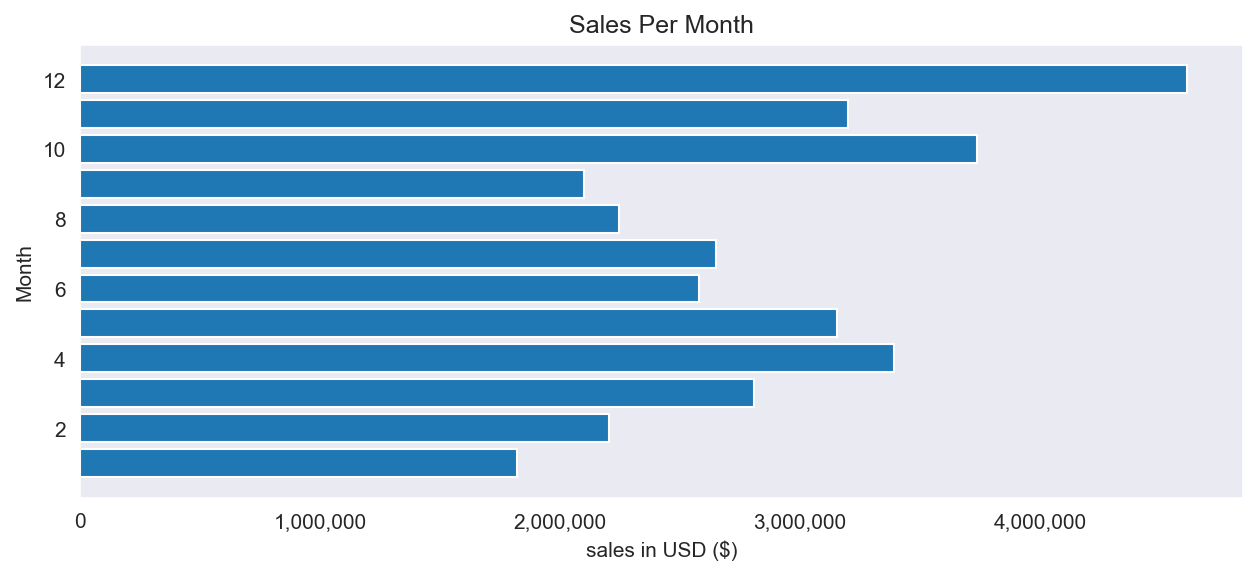

In [20]:
best_month = data_updated.groupby('month')['sales'].sum()
best_month = best_month.sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(best_month.index, best_month.values)
ax.set_ylabel('Month')
ax.set_xlabel('sales in USD ($)')
ax.set_title('Sales Per Month')
plt.subplots_adjust(hspace=0.8)
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.show()

### Qeustion 1: What US city/country had the highest number of sales? 

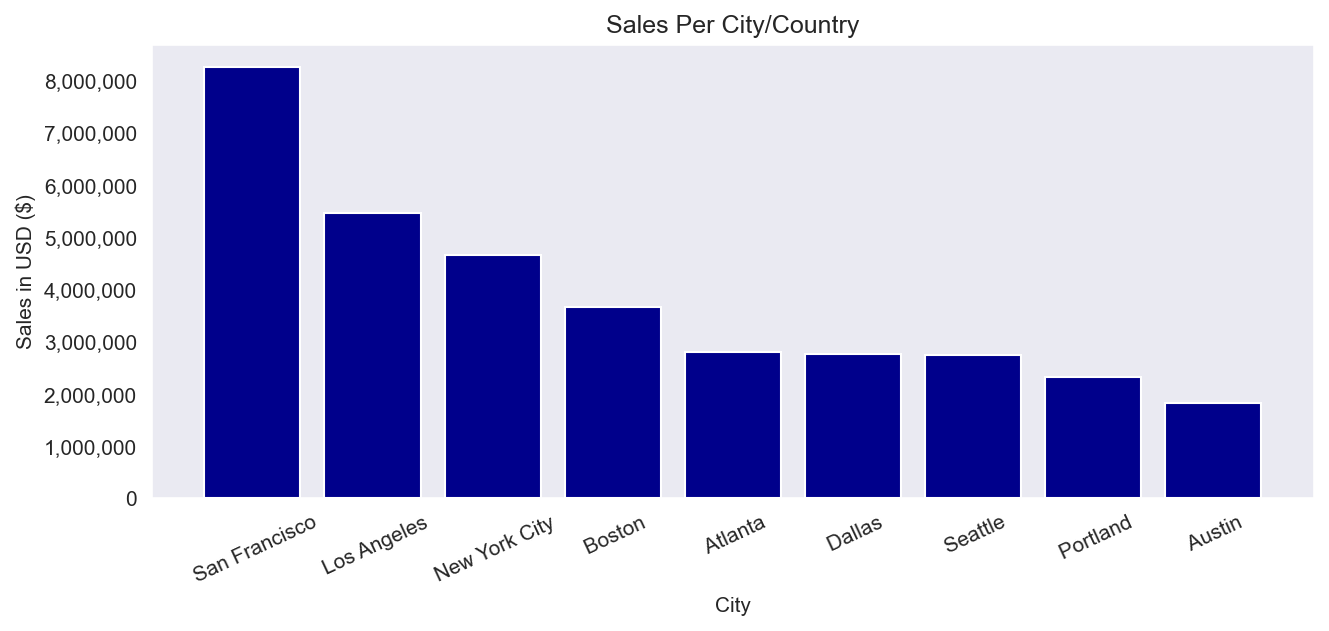

In [21]:
sales_by_city = data_updated.groupby(data_updated['Purchase Address'].str.split(',', expand=True)[1])['sales'].sum()
sales_by_city = sales_by_city.sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(sales_by_city.index, sales_by_city.values, color='darkblue')
ax.set_ylabel('Sales in USD ($)')
ax.set_xlabel('City')
ax.set_title('Sales Per City/Country')
ax.tick_params(axis='x', labelrotation = 25)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.subplots_adjust(hspace=0.8)
plt.show()

### Qeustion 3: What time should we disaplay advertisements to maximize likelyhood of customer's buying our product? 

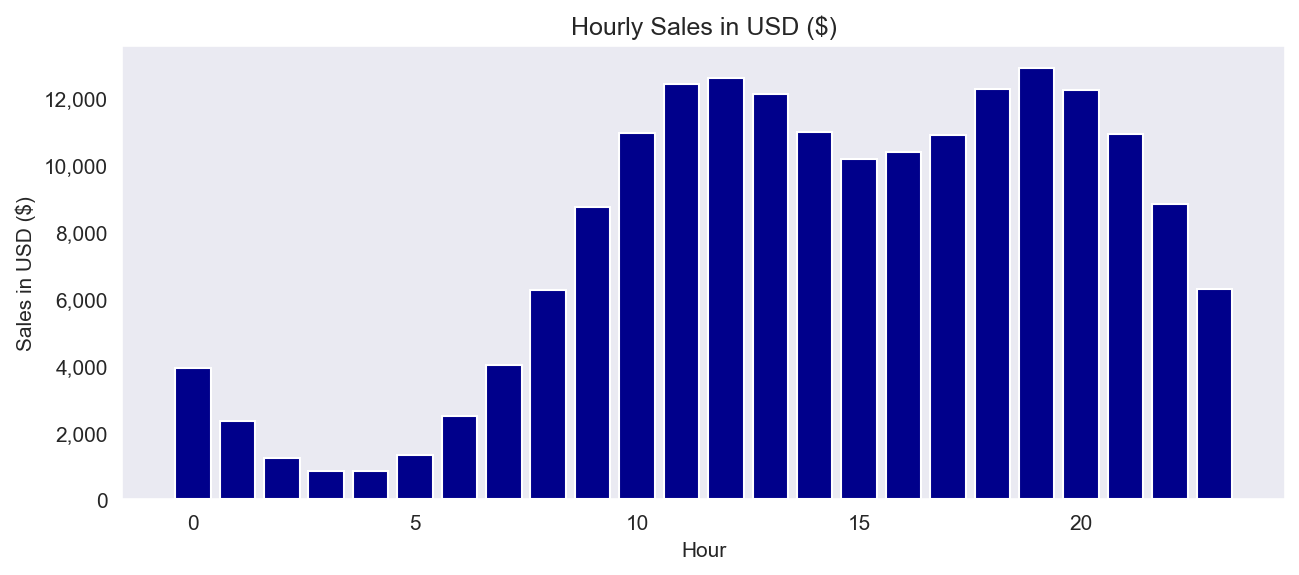

In [22]:
hourly_ads_evaluation = data_updated.groupby(data_updated['Order Date'].dt.hour)['sales'].count()
hourly_ads_evaluation = hourly_ads_evaluation.sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(hourly_ads_evaluation.index, hourly_ads_evaluation.values, color='darkblue')
ax.set_ylabel('Sales in USD ($)')
ax.set_xlabel('Hour')
ax.set_title('Hourly Sales in USD ($)')
ax.tick_params(axis='x', labelrotation = 0)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.subplots_adjust(hspace=0.8)
plt.show()

### Qeustion 4: What products are most often sold together? 

In [108]:
duplicate_orders = data_updated[data_updated['Order ID'].duplicated(keep = False)]
duplicate_orders['Grouped'] = duplicate_orders.groupby(duplicate_orders['Order ID'])['Product'].transform(lambda x: ','.join(x))
duplicate_orders.head()

/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_62970/1969382468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_orders['Grouped'] = duplicate_orders.groupby(duplicate_orders['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day_of_week,sales,Grouped
16,295681,Google Phone,1,600.000000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019,12,2,600.0,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.950000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019,12,2,11.95,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.989998,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019,12,2,99.989998,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.990000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019,12,2,11.99,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.000000,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019,12,4,400.0,"Vareebadd Phone,USB-C Charging Cable"


In [45]:
dropped_df = duplicate_orders[['Order ID', 'Grouped']].drop_duplicates()

In [66]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dropped_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
value_pairs = pd.DataFrame(count.most_common(5)).rename(columns={0:'Combinations', 1:'# Sold together'})

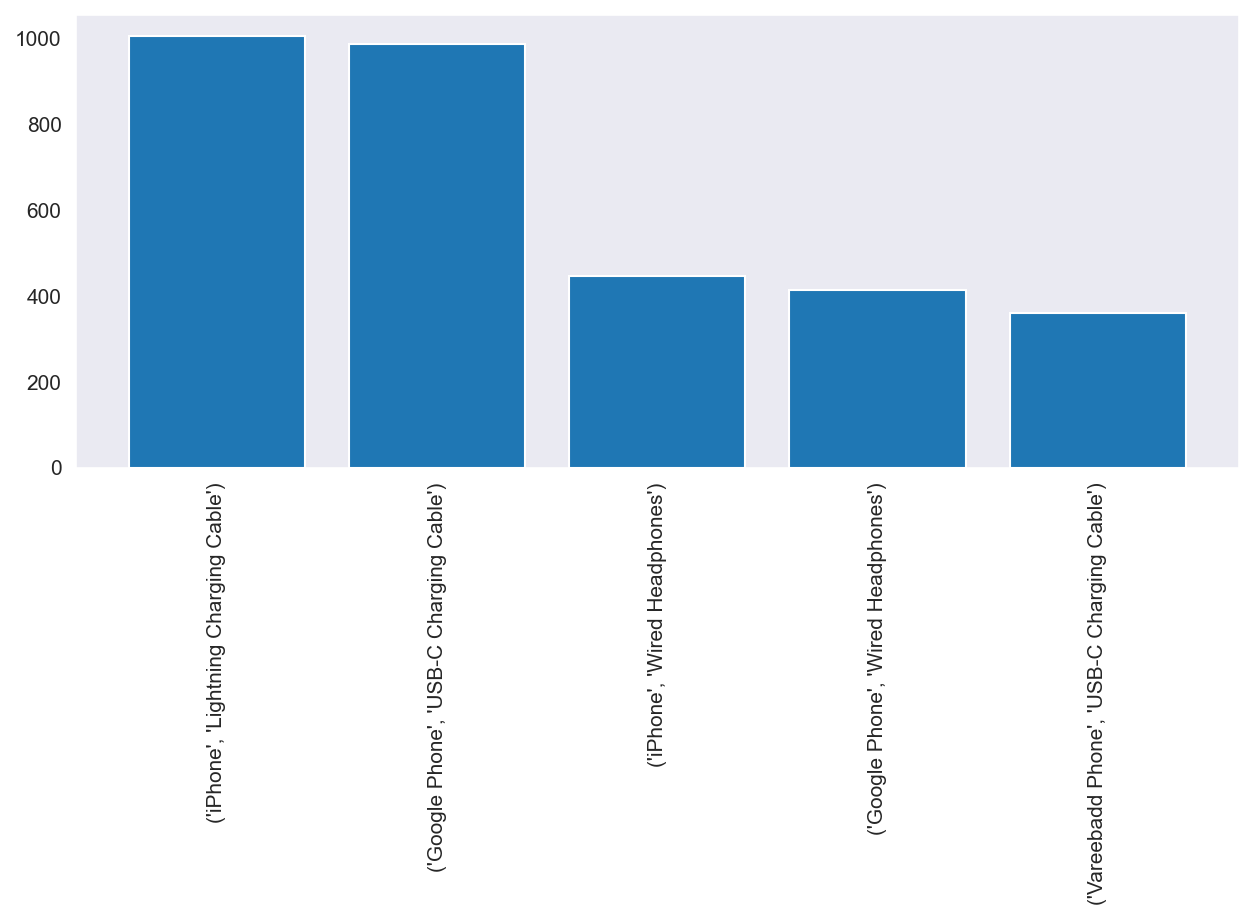

In [75]:
plt.bar(value_pairs['Combinations'].astype(str), value_pairs['# Sold together'])
plt.tick_params(axis = 'x', labelrotation = 90)

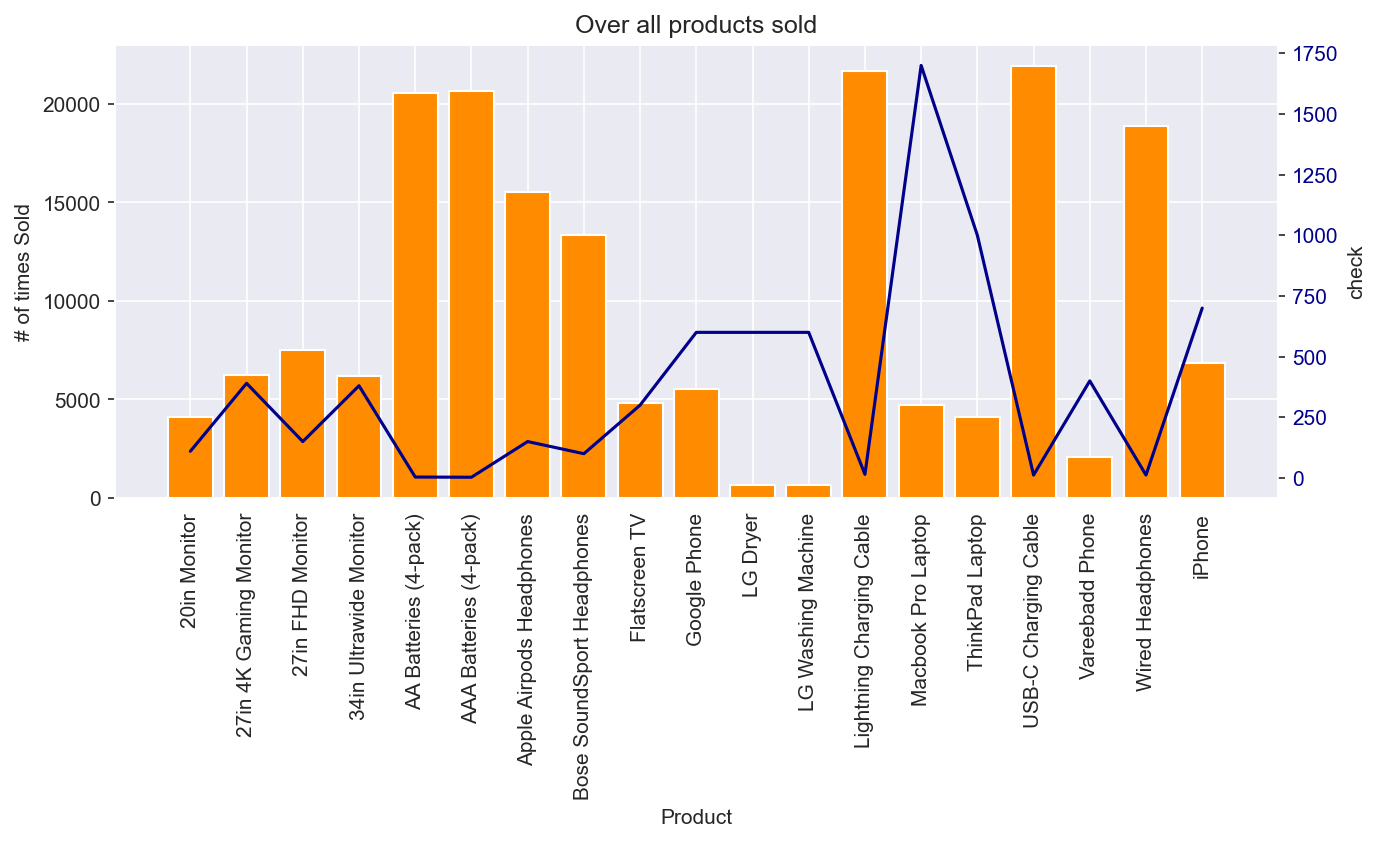

In [105]:
products = data_updated.groupby(data_updated['Product'])['Quantity Ordered'].count()

prices = data_updated.groupby(data_updated['Product'])['Price Each'].mean()


fig, ax1 = plt.subplots()

ax1.bar(products.index, products.values, color='DarkOrange', label= 'Products sold')
ax1.tick_params(axis='x', labelrotation = 90)
ax1.set_xlabel('Product')
ax1.set_ylabel('# of times Sold')
ax1.set_title('Over all products sold')
ax1.grid(True)

# Create twin axis on the right side
ax2 = ax1.twinx()

# Create a line chart on second y-axis
ax2.plot(prices.index, prices.values, color='darkblue', label='Price')
ax2.set_ylabel('check')
ax2.tick_params(axis='y', labelcolor='darkblue');